#### 기술통계분석
* 기술: describe 또는 narrate
* 기술통계량: 데이터의 특징을 설명하기 위한 지표
* 평균, 분산, 표준편차
  - 평균(mean): 중심의 의미를 내포하고 있기 때문에 자료의 대표성을 나타내기에 적절
    + 산술평균: 자료들의 전체 합을 자료의 개수(또는 자유도)로 나눈 값 (일반적으로 알고 있는 평균의 개념)
    + 기하평균: 자료들의 곱을 자료 수만큼 제곱근한 값 (ex. 예금 이자의 복리 계산과 같이 주로 곱셈으로 계산하는 값들의 평균)
      * 일반적으로 기하평균 < 산술평균
    + 조화평균: n개의 양수에 대하여 그 역수들을 산술평균하고 이를 다시 역수로 취한 값 (ex. 데이터의 평균적인 변화율이나 업무능률의 평균)
  - 분산(variance): 자료들과 평균값의 차이인 편차를 제곱한 값들의 평균
  - 표준편차(standard deviation): 분산의 값을 제곱근한 값 (분산 값이 편차 제곱의 평균이기 때문에 본질적인 데이터의 산포수준보다 과장되기 때문에 제곱근을 취함)
    + 분산이나 표준편차가 클수록 데이터의 분포가 불안정하고, 작을수록 데이터의 분포는 안정적
* 왜도와 첨도
  - 왜도와 첨도는 산포도의 치우침과 뾰족함을 나타냄으로써 산포도의 외형적인 특징을 잘 설명해줄 수 있음
  - 왜도(skewness): 자료들의 분포가 왼쪽 또는 오른쪽으로 치우쳐 있는 정도를 나타내는 통계량
    + 왜도 > 0: 전체적인 분포가 왼쪽으로 치우친 오른쪽 꼬리 비대칭 분포
    + 왜도 = 0: 좌우대칭 분포
    + 왜도 < 0: 전체적인 분포가 오른쪽으로 치우친 왼쪽 꼬리 비대칭 분포
  - 첨도(kurtosis): 뾰족한 정도를 나타내는 값으로 자료들이 얼마나 평균에 집중되어 있는지 확인할 수 있는 통계량
    + 첨도 > 0: 정규분포보다 뽀족한 분포의 형태를 보임
    + 첨도 < 0: 정규분포보다 완만한 구릉 모양의 형태를 보임
* 기타 기술통계량
  - 중앙값(median): 자료를 크기 순서대로 늘어놓았을 때 가장 중앙에 위치한 값
    + 자료의 수가 홀수일 때: 중앙값 $\rightarrow$ ${(n+1)}\over{2}$ 순번에 위치한 값
    + 자료의 수가 짝수일 때: 중앙값 $\rightarrow$ $n\over2$번째와 ${n+2}\over2$번째 순번 값의 합을 2로 나눈 값
  - 최빈값(mode): 자료의 집단에서 가장 많이 관측되는 수치
    + 최빈값이 두 개일 경우: 이봉분포
    + 최빈값이 세 개 이상일 경우: 다봉분포
    + 모든 자료의 값의 수가 같을 경우 최빈값은 존재하지 않음
  - 사분위수(quartile): 자료들을 크기 순서로 늘어놓았을 때 누적 백분율을 4등분한 각 점에 위치한 값
    + 1사분위수 = 누적백분율 25%, 2사분위수 = 누적백분율 50%, 3사분위수 = 누적백분율 75%, 4사분위수 = 누적백분율 100%
    + 특정 영역에서의 집중성이나 편중성 묘사

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Ashopping.csv', sep=',', encoding='CP949')
df_1 = df[['할인권_사용 횟수','성별']]
df_1

,할인권_사용 횟수,성별
0,1,1
1,22,1
2,6,1
3,1,1
4,9,0
...,...,...
995,3,1
996,6,0
997,8,0
998,20,1


In [3]:
# 성별 평균, 분산, 표준편차 구하기
print(df_1.groupby('성별').mean())
print(df_1.groupby('성별').var())
print(df_1.groupby('성별').std())

    할인권_사용 횟수
성별           
0   15.986577
1   16.034078
    할인권_사용 횟수
성별           
0   69.053873
1   69.750602
    할인권_사용 횟수
성별           
0    8.309866
1    8.351683


In [4]:
# 왜도와 첨도 구하기
print(df.서비스_만족도.skew())
print(df.서비스_만족도.kurt())

-0.9706614720587393
1.1478245800949547


<AxesSubplot:>

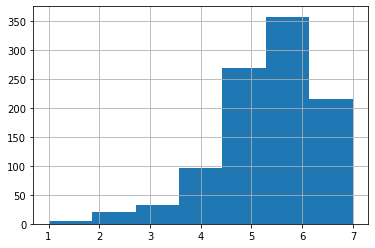

In [5]:
# 히스토그램 그리기
%matplotlib inline
df.서비스_만족도.hist(bins=7)

In [8]:
# 기타 기술통계량 구하기

# 4사분위수 구하기
print(np.percentile(df['할인권_사용 횟수'], 25))
print(np.percentile(df['할인권_사용 횟수'], 50))
print(np.percentile(df['할인권_사용 횟수'], 75))
print(np.percentile(df['할인권_사용 횟수'], 100))

# 최빈값 구하기
print('최빈값:', df['할인권_사용 횟수'].value_counts().idxmax()) # 최빈값을 직접 출력하는 함수 X, value_counts()로 빈도를 구하고 가장 큰 값을 출력하는 함수 idxmax() 사용

# 기술통계량 출력
print('기술통계량:\n', df['할인권_사용 횟수'].describe())

9.0
17.0
23.0
30.0
최빈값: 22
기술통계량:
 count    1000.000000
mean       16.027000
std         8.341334
min         1.000000
25%         9.000000
50%        17.000000
75%        23.000000
max        30.000000
Name: 할인권_사용 횟수, dtype: float64
